# Machine Learning and Statistics Project 2020
Author Angela Carpenter
- [power production dataset](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) from Ian McLoughlin Github

# Table of Contents
- Project Instructions / Overview
- Project plan
- About this Notebook
- Python Libraries
- Downloading and running the code
- Loading / Reading in the dataset
- Exploring the dataset
- Describing the dataset
- Summary Statistics
- Visualising the dataset using plots
- Summary and Conclusions
- References


## Project Instructions

In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items.
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## notes to self
As a reminder as I will forget where I am!

- whether to keep all zeros in or out
- scaling the input and output values
- I trained a neural network with and without the zeros, definitely the learning curve looks much better when the zeros are dropped. I first only dropped the zero values for the very high speed values as the turbines would be switched off in dangerous winds. I then tried dropping all, then some!
- I also need to look at the web app side of it so I won't get carried away on training the model until I have this up and running even if the model is not perfect. It seems to be a case of playing around with the parameters and it is surprising how well the NN models the data given only single numerical values fed into it.
- dfx is a copy of df with some zeros dropped (speed values over 24.4)
- dfz is a copy of df with all zeros dropped, or maybe it was zeros where power was over a certain value. Anyway its near the end of the notebook.
- I will probably lose all the numpy polyfit regression models and maybe leave in the higher order polynomial using scikit learn.
- I might look again at scikit learn to see if there are any other models to try. if I have time that it...
- I do have docker installed.
- I am following some machine learning mastery tutorials which are really informative. Also the keras for engineers.




In [127]:
# first importing the following libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

import csv

In [136]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

In [137]:
# make a copy of the dataframe
dfx = df.copy()


In [138]:
print("The first few rows in the dataset: \n\n", df.head(3))  # look at the top 5 rows of the DataFrame df
print('\n The final few rows in the dataset \n',df.tail(3)) # Look at the bottom 5 rows of the DataFrame

The first few rows in the dataset: 

    speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0

 The final few rows in the dataset 
       speed  power
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [139]:
print("The index of the DataFrame: ", df.index) # the index or row labels of the DataFrame
print("The dtypes in the dataframe are:", end='\n\n')

print(df.dtypes) # the data types attributes for each column in df

The index of the DataFrame:  RangeIndex(start=0, stop=500, step=1)
The dtypes in the dataframe are:

speed    float64
power    float64
dtype: object


### Null values
Here I check for null values. The `isnull` function returns no null values, yet there does appear to be null values when you look at the head and tail of the dataset so I need to investigate this further. 
I think my problem is that zero values are not Null values in Python. Null values are not zero in Python.(https://realpython.com/courses/python-none/)

https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element

In [140]:
print(df.isnull().sum())
df.notnull().sum()

speed    0
power    0
dtype: int64


speed    500
power    500
dtype: int64

In [141]:
df.isnull().values.any()

False

### Zero values
There are no null values in the dataset but there are some zero values. While there is only one zero value for the `speed` variable, there is a whopping 49 zero values for the `power` variable!
I looked at some plots below but will bring them up here.
Look at the distribution of values to see if the zero values are very unusual compared to the remaining 451 values for the power variable. I don't know much yet about wind turbines but I would have thought that there should be more smaller values for wind speed than power. For instance on a very dry still day, maybe there would be very little or even no speed at all in the wind? However the dataset has only 1 zero value for speed.

From the project description, the power variable represents wind turbine power output and the speed values are wind speed values.


In [142]:
#The proportion of zero values 
40/500

0.08

### Visualise the data
I will visualise the data here before looking at the summary statistics below.
The histogram of wind speed looks quite uniform when the default number of bins are used, spread across speeds from almost zero to 25. (I need to see what exactly is being measured here, how wind speed is represented).
The wind turbine power values seem to have a peak at very low values. This is not surprising given the large number of zero power values in this dataset. Almost 10% of the power values supplied are zero.  There is another peak around values of 95-100. Most of the remaining power values fall between 18 and 85.
A scatter plot can show if there is any visible relationship between the two variables. For 


### Visualise the relationship between wind speed and wind turbine power:
The scatter plot below a linear relationship between wind speed values and power for mid-range speed values only.
- When wind speed increases from very low levels, the power does not increase by much or at all. 
- The wind turbine power values does start to increase with the wind speed from wind speed values of about 5 to about 18/19. 
- From wind speeds of 20 onwards to about 25 the power values increase no further and seem to level off. 

Before I go and look up some info on wind turbines, I can make some guesses here.
- Perhaps at very low levels of wind speed, there is simply not enough speed to get any level of movement going and at a particular speed level the power maxes out, that there is simply no way for the turbine to generate more power no matter how fast the wind becomes after a certain level. 
- Maybe once the turbine is started up from zero it will take some time before any measurable units of power can be generated, and once a sufficient level of wind speed is reached, it takes little change in speed to keep the turbine going and small reductions in speed would have little impact on the turbine once it is in motion.
- Maybe some of the power being generated is actually being consumed by the turbine. Maybe after a while once the turbine gets going, it requires little energy to continue.

#### Update!
The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. The first time I looked at this I was wondering if the data values represented measurements over a particular period of time and if the lower values of power might be related to the time taken for the turbines to get up and running before they could generate any power or if some of the zero power values were related to periodic maintenance when the turbines might get switched off. There does seem to be some linear relationship between the two variables for the middle portion of the dataset and the power generated does seem to level off after a particular point.

However looking at the raw data in the csv file, the rows are ordered by ascending values of speed column with the corresponding power values in the other column. There is no indication as to how the data values were collected and therefore I don't think I can make any judgements about the data over a particular timeframe. There are only two columns of numerical data provided with no indication provided as to their measurement units.  I will just focus on trying to use some algorithms to predict the power values based on the input values of speed.  

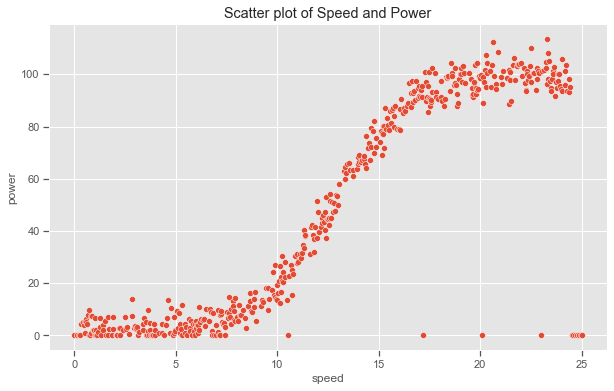

In [143]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

In [144]:
# https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element
0 in df.values
df.isin([0]).any().any()

True

In [145]:
#https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe

df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [146]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [147]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


In [148]:
df.sort_values(by='power', ascending=False).head()

,speed,power
461,23.273,113.556
416,20.646,112.362
447,22.497,109.932
420,20.871,108.485
464,23.348,108.167


In [149]:
df.sort_values(by='power').head()

,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0


In [150]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


The [DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) function `df.to_numpy()` gives a NumPy representation of the underlying data. It converts the dataframe to a numpy array which may be useful here given that the data is all numerical types (floats64).

## Exploring the dataset using statistics

There are no categorical variables in this dataset.

### Quantitative variables
When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers.
Pandas `describe` function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values)

In [151]:
# get summary statistics of the numerical values, 
df.describe() # get statistics summary of the

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Central Tendency statistics of the dataset

The **central tendency** or location of the data distribution is determined by the typical or middle values. The arithmetic mean is the sum of all the data values divided by the number of values. While the mean value is the average value in the dataset it may not be typical of the values in the dataset if there are very small or very large values in the dataset. The *median* is another measure of central tendancy - it is the middle value after all the values are put in an ordered list.
The mean and median are similar for symmetric distributions whereas for unimodal skewed distributions the mean will be more in the direction of the long tail of the distribution. 
The median can be considered a more typical value in the dataset or closer to some of the typical values and is also considered [robust](https://en.wikipedia.org/wiki/Robust_statistics) which means that removing some of the data will not tend to change the value of the median. A few extreme values will not affect the median as they would affect the mean. 
In this dataset the mean and median wind speed values are similar at approx 12.5 to 12.6.
The median power value is just over 41 compared to the mean power value of 48.
As we saw above, there are many zero values for power in the dataset. At least 10% of the power values are zero and probably for valid reasons.



In [152]:
print("The mean speed value is %.3f" %df['speed'].mean(),"while the median speed value  is %.3f" %df['speed'].quantile(q=0.5))
print("The mean power value is %.3f" %df['power'].mean(),"while the median power value  is %.3f" %df['power'].quantile(q=0.5))

The mean speed value is 12.590 while the median speed value  is 12.550
The mean power value is 48.015 while the median power value  is 41.645


#### Spread statistics
There are several statistics that are used to show the spread of the distribution of the data which concerns how far away from the centre the data points are located. The variance is the average of the squared deviations of each observation from the centre or mean of the data. Bigger deviations will make a bigger variance. The resulting variance figure will be in squared units of the original units. The *standard deviation* is the square root of the variance and is in the same units as the data and therefore can be more easily interpreted. 

In [153]:
#print(f"The variance and standard deviations of speed values  are {df['speed'].var():.3f} and {df['speed'].std():.3f}")
#print(f"The variance and standard deviations of power values are {df['power'].var():.3f} and {df['power'].std():.3f}")
print(f"The standard deviations of speed values  is {df['speed'].std():.3f}")
print(f"The standard deviations of power values is {df['power'].std():.3f}")
# df.var()

The standard deviations of speed values  is 7.225
The standard deviations of power values is 41.615


The *range* of values in the data is shown by the minimum and maximum values and is not considered a robust measure of spread but it is useful for showing possible errors or outliers. 

In [154]:
print(f"The minimum speed value is {df['speed'].min()} while the maximum speed value is { df['speed'].max()} giving range of {df['speed'].max() - df['speed'].min()}")

print(f"The minimum Power value is {df['power'].min()} while the maximum power value is { df['power'].max()} giving range of {df['power'].max() - df['power'].min()}")

The minimum speed value is 0.0 while the maximum speed value is 25.0 giving range of 25.0
The minimum Power value is 0.0 while the maximum power value is 113.556 giving range of 113.556


Another measure of spread is determined by the percentiles or quartiles of the values.  
The 25% percentiles is the first quartile and one quarter of the values fall below this. 
The 50% percentile is the median value where half of the data falls below it and half above it. 
-The 75% percentiles is the 3rd quartile where $\frac{3}{4}$ of the data points fall below it and one quarter above it. These figures are used to calculate the *Interquartile range (IQR)* which is calculated by taking the 75% percentile or 3rd quartile (Q3) minus the 25% percentile or first quartile (Q1). $$IQR = Q3 - Q1$$
Therefore half of the values are captured by the IQR which are the middle values of the data. Data that is more spread out will have a higher IQR. The IQR is considered a more robust measure of spread than the variance and standard deviation and will be more clearly shown in the boxplots further down. The IQR does not consider the data below the 25% percentile or above the 75% percentile which may contain outliers. The statistics here show that the **power** variable in this dataset is much more spread out or variable than the **speed** variable.  

In [155]:
print(f"The median speed value is {df['speed'].quantile(q=0.5)} with the IQR ranging from {df['speed'].quantile(q=0.25):.2f} to  {df['speed'].quantile(q=0.75):.2f}")
print(f"The median power value is {df['power'].quantile(q=0.5)} with the IQR ranging from {df['power'].quantile(q=0.25):.2f} to  {df['power'].quantile(q=0.75):.2f}")

The median speed value is 12.5505 with the IQR ranging from 6.32 to  18.78
The median power value is 41.6455 with the IQR ranging from 5.29 to  93.54


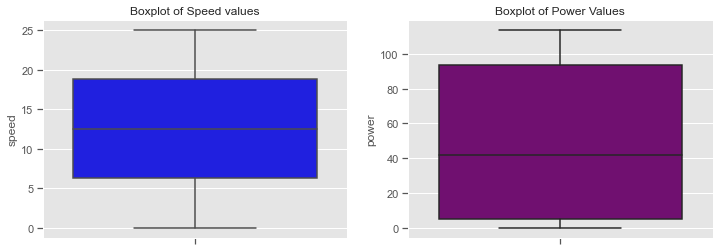

In [156]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=df['speed'], ax=axes[0], color="blue")
# add a title
axes[0].set_title("Boxplot of Speed values")
sns.boxplot(y=df['power'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Power Values");

The skewness of the data is a measure of assymetry which can be seen by the lopsidedness of a boxplot.
Wind speed appears to be quite symmetric. The wind speed boxplot is cut pretty much in half by the median. Power appears to be soemwhat skewed to the right as the boxplot shows more of the box to the right or above the median line.
A boxplot with the median closer to the lower quartile is considered positively skewed. Positively skewed data has the mean greater than the median and it can be interpreted as having a higher frequency of high valued scores. The lower values of power are closer together than the higher power values.


### Describing the dataset visualisations - maybe move some visualisations up before the statistics
This section will look at some graphical EDA of the univariate data in the dataset.
Some visualisations of the dataset that can be used to verify these summary statistics. 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations.

#### Histogram and Kernel Density estimate plots of Speed and Power values
Histograms can be used to show the distribution of a single quantitative variable such as the speed or power in this dataset. A histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. 
Such a plot charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a *bin*. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. Changing the number of bins can reveal some other features of the data.


(The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode.)

The histogram of wind speed looks to be uniformly distributed with wind speed values spread out from zero up to 25 which seems to be the max speed value. Power values on the other hand looks bimodla with two defined peaks, one around zero power values and the second around the 100 kilowatt mark. 

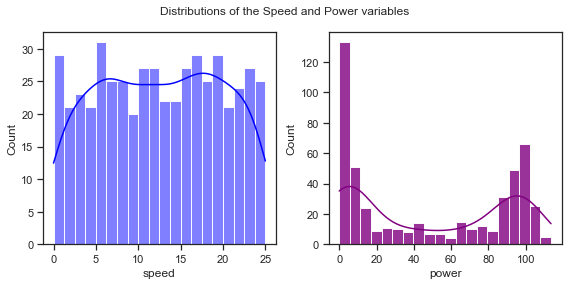

In [157]:
%matplotlib inline

# plot the histograms of Speed values
f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=df, x="speed", ax=axs[0], bins=20, kde=True,color="blue")
sns.histplot(data=df, x="power", alpha=.8, legend=False, ax=axs[1], bins=20, kde=True, color="purple")
plt.suptitle("Distributions of the Speed and Power variables")
f.tight_layout()

## Investigating a relationship between Wind Speed and Wind Turbine Power output

Scatter plots are useful to identify trends and patterns in a dataset which might indicate a relationship between variables. The dataset here contains two numerical variables wind speed and turbine power values. 
The ordered pairs of numbers consisting of the independent variable 'wind speed' and the dependent variable 'power output' are plotted below resulting in a joint distribution of the two variables. Each point represents an actual observation is the dataset with a speed and a corresponding power value. 
The scatter plot shows an increasing linear trend in the middle range of the wind speed values. This would indicate that for increasing wind speeds in this range, power output values do increase, but only after a minimum wind speed has been reached. Power outputs then increase in line with increases in wind speed until it reaches a peak and plateaus.
The correlation statistics puts a numerical value on the strength and direction of the relationship. 

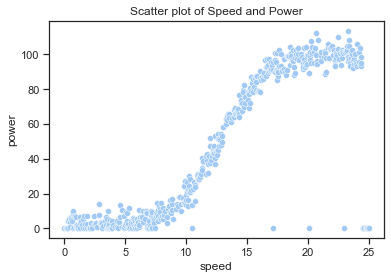

In [158]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

### Correlation and Covariance of Speed and Power values
For two quantitative variables such as the wind speed and power values, the covariance and correlation can be used to determine whether a linear relationship between variables does exist and to show if one variable tends to occur with large or small values of another variable.

The [Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two random variables and the (Pearson) [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the normalised version of the covariance which shows by its magnitude the strength of the linear relation.

The covariance can be used to see how much two variables such as wind speed and wind turbine power vary with each other and in what direction turbine power output will move when wind speed value moves. 
If the covariance here is positive it would mean that when the wind speed measurement is above it's mean then the wind turbine power measurement will more than likely be above it's mean also and vice versa. 
If the covarince here is negative, when wind speed measurements are above their mean value, then the wind turbine power output is likely to be below its mean value.
If there is a zero covariance (or a covariance value close to zero) this implies that the two variables wind speed and wind turbine output vary independently of each other. 

The correlation statistics are computed from pairs of arguments. If there is a strong positive relationship between the wind speed and wind turbine power output variables, we would expect to see a correlation coefficient close to 1. A strong negative relationship would have a correlation coefficient value close to -1. A value close to zero would indicate that there is no relationship between the variables. The correlation is easier to interpret than the covariance as it does not depend on the units of measurement or which variable is the independent variable and which is the dependent variable. 

Pandas can be used to easily calculate the covariance and correlation coefficient. The correlation coefficient here of 0.85 shows there is a very strong positive relationship between the wind speed and turbine power output.

(It should be noted that correlation however is not the same as causation.)


In [160]:
df.cov()
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


### Regression plots
The Python Seaborn library has some regression plots that can be used to quickly visualise relationships and patterns that may exist in the data. They use statistical models to estimate a simple relationship between sets of observations and are mainly used to visualise patterns in a dataset during the exploratory data analysis. There are other Python libraries such as **statsmodels** that are recommended for looking at more quantitative measures concerning the fit of the regression models which can be looked at later on!.

The scatter plot earlier showed a relationship between wind speeds and wind turbine power that is not quite linear. There does seem to be a somewhat linear relationship for wind speeds between values of about 10 up to about 18 or so. Therefore it is worth looking at higher order polynomials as well as linear regression.
The plot below shows that the polynomial with order 3 looks a much better fit to the line than the first or second order linear regression lines. 

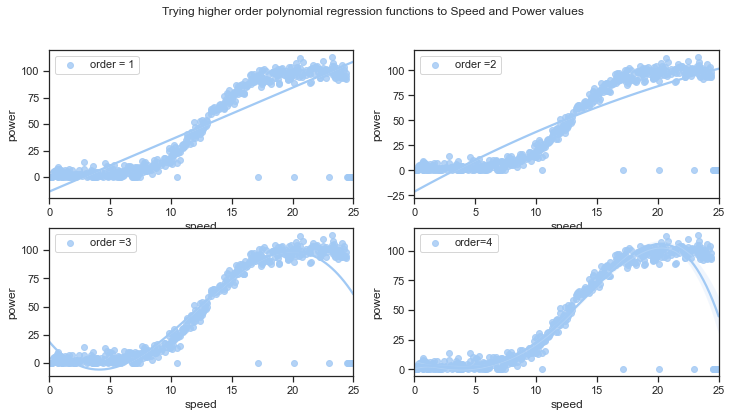

In [161]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
x = "speed"
y = "power"
sns.regplot(x="speed", y="power", data=df, ax=axes[0,0], label="order = 1", ci=False); axes[0,0].legend()
sns.regplot(x="speed", y="power", data=df, order=2, ax=axes[0,1], label="order =2", ci=False); axes[0,1].legend()
sns.regplot(x="speed", y="power", data=df, order=3, ax=axes[1,0], label="order =3", ci=False); axes[1,0].legend()
sns.regplot(x="speed", y="power", data=df, order=4, ax=axes[1,1], label = "order=4"); axes[1,1].legend()
plt.legend()
plt.suptitle("Trying higher order polynomial regression functions to Speed and Power values")
plt.show()

#### Using a lowess smoother to fit a regression of speed and power
Another way of fitting a nonparametric regression is to use
[lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/) to fit a line to a scatter plot where noisy data values, sparse data points or weak interrelationships might interfere with your ability to see a line of best fit. (Lowess smoothing is also used for linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use)

Lowess are non-parametric strategies for fitting a smooth curve to data points. A parametric fitting assumes the data fits some distribution which can misrepresent the data whereas non-parametric smoothers try to fund a curve of best fit without assuming the data must fit some distribution shape.


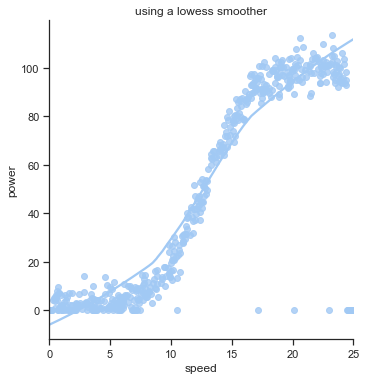

In [162]:
sns.lmplot(x="speed", y="power", data=df, lowess=True)
plt.title("using a lowess smoother")
plt.show()

Residual plots can be used to check whether the simple regression model of speed ~ power  is appropriate for a dataset.
A residplot fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0. If there is structure in the residuals, this suggests that simple linear regression is not appropriate for the data.

If the residual plot does have a shape this suggest non-linearity in the data set.

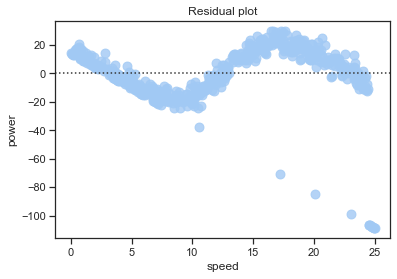

In [163]:
sns.residplot(x="speed", y="power", data=df, scatter_kws={"s": 80})
plt.title("Residual plot"); plt.show()

---
## Researching Wind Turbines
As there is little in the dataset apart from two columns of 500 floating numbers, I need to do a little research to find out what these values represent and how they are quantified. Power is probably in kilowatts and speed in something per hour!. There is a mention of 15 metres per second at the turbine in the video.
I am looking up some information about Irish wind farms. I'm presuming where exactly the data came from does not matter. 

[The Irish Wind Energy Association (IWEA)](https://www.iwea.com/about-us/about-us) is the representative body for the Irish wind industry, working to promote wind energy as an essential, economical and environmentally friendly part of the country’s low-carbon energy future. 
They note here that in 2018 wind energy provided 29 per cent of Ireland’s electricity.

Their [FAQs](https://www.iwea.com/about-wind/faqs) page tells us that each quarter, both EirGrid and ESBN publish updated wind farm statistics for Ireland at the following links:
[ESBN Connected Wind Farms](https://www.esbnetworks.ie/new-connections/generator-connections/generator-connection-statistics).
There is currently 4,130 MW of installed capacity in ROI and new Eirgrid link here http://www.eirgridgroup.com/how-the-grid-works/renewables/

Also on this website is a question about how much electricity a turbine generates. (See FAQ 16.)

>The amount of electricity a turbine can generate depends on the type of turbine and the wind conditions at any time. There are many different models of turbines that can generate different amounts of electricity. Ireland’s largest wind farm is the Galway Wind Park in Connemara. The turbines there are 3 MW turbines. To use them as an example, when the wind is blowing steadily they can each generate 3 MW of electricity. A megawatt (MW) is a unit of energy.A single megawatt is equivalent to around 1,000 kilowatts. Boiling a kettle, for example, takes around two kilowatts.

Another website of interest is Eirgrid's [Smart grid dashboard](http://smartgriddashboard.eirgrid.com/#all/about).
The [dashboard](http://smartgriddashboard.eirgrid.com/#all/wind)shows actual and forecast wind generation by day, week and month for allwind farms on the system.

The [sem-o.com](https://www.sem-o.com/links/) that we looked at in Data Representation might be worth a look also. It has a page of links. Not sure yet how much detail if any I need. The data.gov.ie might have some datasets.
Also the EU Open data portal has some datasets.
https://data.europa.eu/euodp/en/data/dataset/jrc-emhires-wind-generation-time-series
[Electricity from wind power; AC; production mix, at power plant; < 1kV (Location: RER)](https://data.europa.eu/euodp/en/data/dataset/jrc-eplca-fe1c3d03-072b-4da7-8fff-3505f9b01efc)

- [WindEurope](https://windeurope.org/data-and-analysis/) has facts and issues about wind energy in Europe, in particular the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/)

Watching the video on this project again, the lecturer Ian notes how the idea for the project came about. 
Say a company produces power using wind turbines. In the electricity market, producers of electricity would sell their electricity ahead of time.  They enter into a contract that says they will produce so many kilowatts  electricity during at a certain time, maybe between 11am tomorrow and 11am the next day. The price is negotiated today and tomorrow you start generating electricity and pushing it onto the supply grid. 
It is easier for those burning coal or gas or doing nuclear fusion to burn the right amount to generate the right amount of electricity. With wind turbines however you don't know how much electricity you will generate tomorrow because your generation of electricity depends on wind power. As you don't know how much wind there is going to be tomorrow you make an estimate by getting some meterological data from Met Eireann or some other weather prediction agent and use the weather prediction to help you predict how much electricity you are likely to produce. The prediction may not always be correct but you aim to reduce how often your calculations are wrong.

A first step in that kind of workflow would be to say when the wind speed is X amount, for example at 15 metres per second at the turbine, how much power is produced from the wind turbines. The wind turbine supplier would have provided a rough estimate of how much power the turbine is capable of producing at 15 metres per second. Knowing all this is not really necessary for this project but to instead take the dataset with the two columns of numerical values and be able to predict one of the numbers from the other.




Based on above, it is likely that the wind speed is measuring in so many metres per second. The video mentions 15 as an example but I need to check this out. Power is most likely in kilowatts. I need to look up some more on this.
As noted above in the initial investigation of the dataset, there are quite a number of zero values for power in the dataset. I need to determine whether these values are valid and if so should they remain in the data when I go to the next step of training a model. As theorised earlier, perhaps some of the low or zero values are there when a wind turbine is powered on after being off and taking some time or effort to be productive. However I need to check as I don't know the physics or technical reasons behind this. While most of the zero power values are associated with low values of speed, there are some that are not and occur when the wind speed is actually at it's max in the dataset so therefore there must be another reason that the power output is zero at such levels, as if the wind turbine is actually power off completely and maybe this is the case. Maybe it switches off after a certain max wind speed for safety or other reasons. These values do look like outliers on the scatter plot.
The scatter plot seems to have three different trends apparent as shown earlier, the first section at low values of wind speed where the wind turbine values are clustered around zero (including the 10% of observations that have zero power values), the second section where there seems to be a linear trend between wind speed and power output and thirdly the last section where the values of power have reached a peak at higher wind speeds and plateau, and also the outliers here.


---
### How does wind energy work
Find out some more on how wind energy works. Look at the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/) on WindEurope website.
Few facts here:
- energy is the ability to do work
- [What is Energy ?](https://windeurope.org/about-wind/wind-basics/). 
>Generally, energy can be categorised into either kinetic energy (the energy of moving objects) or potential energy (energy that is stored). The different types of energy include thermal energy, radiant energy, chemical energy, electrical energy, motion energy, sound energy, elastic energy and gravitational energy.
In the case of wind energy, wind turbines take the kinetic energy that’s in the wind and convert that kinetic energy into mechanical power. We mostly use this mechanical power in the form of electricity.

There is plenty more her on how wind is actually caused by 3 things: the heating of the atmosphere by the sun,  the rotation of the earth and the Earth's surface irregularities.
Wind energy captures the energy of the wind and converts it to electricity. It is an alternative to burninf fossil fuels.
A wind turbine is a device that converts kinetic energy from the wind into electricity. A group of wind turbines is a wind farm. There are both on-shore and off-shore types. Their output ranges from as small as 100 kilowatts to as big as 12 megawatts.
There are three main variables determining how much electricity a turbine can produce.
- Wind speed
- Blade radius
- Air density.

Our dataset only has wind speed and power values so perhaps we can assume these values are constant for the dataset, particularly I would think the blade radius. 
The article also outlines what happens when the wind doesn't blow. A wind farms location is usually chosen purposely. Therefore when a wind turbine is not turning it is usually because of maintenance, or because it must be stopped for safety reasons in case of strong winds or a storm. So safety reasons would account for the zero power values at the very high values of wind speed and maintenance could account for some of the other zero values Therefore I may need to see exactly what the pattern is here. Perhaps then some of the zero values should be ommited from some of the analysis and model training, or perhaps done alongside.

In [164]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [165]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


### Cleaning the dataset
#### update!
I have decided to drop some of the zero values after all. After trying to use neural networks below, the cost did not fall below a certain value and it seems to me from the resulting plots that the zero power values at the highest speed values (>24.4) were throwing things out. I think we can just say that when speed values are over 24.4 approx that the power values will be zero as it looks like the turbines are switched off for safety. We can only predict values for power when the turbines are turned on and therefore maybe the model should only be predicting for values of speed where the turbine is on!

So first a refresher on where all the zero values occur. While there is only one zero value for the speed variable, there are 49 zero values for the power variable. These mostly occur below a certain value of speed but located alongside non-zero power values and there are a few that are associated with medium and higher speed values of speed. Most of the data points in the dataset are unique values. The one datapoint with a zero speed value has a zero power value as expected.

### Zeros
For experimental purposes I am going to drop all the zero values.

In [166]:
len(df.groupby('speed')) # 490
df.groupby('speed')['power'].agg(['count', 'size', 'nunique'])
len(df.groupby('power')) # 451

df.groupby('power')['speed'].agg(['count', 'size', 'nunique'])
len(df[['speed', 'power']].drop_duplicates()) # 490

500

#### Where do the zero values occur?

In [167]:
# the rows where both values are zer0
df[(df['speed']==0) & (df['power']==0)].count() # only 1

speed    1
power    1
dtype: int64

In [168]:
# 39 zero power values
df[df['power']==0].count(0)

speed    49
power    49
dtype: int64

In [175]:
# there are no points where speed is greater than 24.4 and power value is not zero
df[df.speed>24.4]
df[(df.speed <10) & (df.power==0.0)]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [170]:
df[df.power==0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [34]:
df.loc[(df.speed>24.4)]

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [35]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
#df.drop(df.loc[(df.speed>24.4)].index, inplace=True)

In [176]:
dfx.drop(dfx.loc[dfx.power == 0].index, inplace=True)

In [177]:
dfx.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [133]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### Dropping more zero values
My predictions were not too good below so I will change a few things again. I think I should drop more of the observations that had zero power values as these could be maintenance related. just guessing for now!
There are several zero power values for the lowest speed values that should stay as these probably mean there is not enough wind to generate power. Power values do kick in after speed goes over 0.3 so this might mean that any datapoint where the wind speed is over 0.3 but has zero power

In [36]:
df.describe()

,speed,power
count,490.000000,490.000000
mean,12.342347,48.994473
std,7.084113,41.461788
min,0.000000,0.000000
25%,6.162250,5.643750
50%,12.374500,44.094500
75%,18.411750,93.697000
max,24.399000,113.556000


# Machine Learning.

Here I am going to start looking at applying some machine learning algorithms to the dataset. 

The goal of the project is to predict wind power from wind speed and therefore this problem falls into supervised learning. 
>Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output [Machine Learning Mastery](https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/) which is precisely what we have been asked to do here.

The algorithms I will start looking at are as follows:

- Regression: Predicting a continuous-valued attribute associated with an object.
I had a look at the regression plots earlier, simple linear regression does not adequately model the relationship between the wind and speed values over the entire dataset while higher order polynomials captured more of the relationship. The simple linear model clearly underfit the data. The correlation statistics did show a high correlation between the variables with a value of 0.853778 but this doesn't mean the relationship is linear.
There were large sections of the dataset that were either under the regression line or above the regression line.
The higher order polynomials did not fit the data perfectly though. 

The first round I did not clean the dataset. I don't think there is any loss of information now by dropping the zero values of power for the very high values of speed. 
I also had not split the dataset into a training and test set as it was more for exploratory analysis.
I think I did do some scaling..

I used numpy polyfit functions the first time around but now will use scikit learn.
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. LinearRegression will take in its fit method arrays X, y and will store the coefficients of the linear model in its coef_ member:


In [37]:
# first importing the following libraries
# Numerical arrays.
import numpy as np
import pandas as pd  
# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

import csv
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [38]:
df.describe()

,speed,power
count,490.000000,490.000000
mean,12.342347,48.994473
std,7.084113,41.461788
min,0.000000,0.000000
25%,6.162250,5.643750
50%,12.374500,44.094500
75%,18.411750,93.697000
max,24.399000,113.556000


In [39]:
df.corr()

,speed,power
speed,1.000000,0.933299
power,0.933299,1.000000


In [40]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (10, 6)

In [41]:
# assign speed to x and power to y
x = df.speed
y = df.power

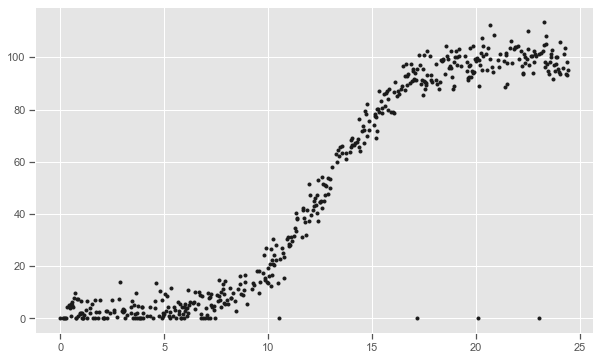

In [42]:
# Plot x versus y.
plt.plot(x, y, 'k.')

In [43]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([  5.46239532, -18.42430465])

In [44]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(5.4623953170946296, -18.42430465093683)

As the plot below shows, there are sections of the fitted line where all the values either fall below the line or above the line. If a linear model was suitable you would expect to see the line going through the centre of the data. The quadratic model does not improve on this. The cubic polynomial fits the data better and the fourth order polynomial does seem to be even better for the datapoints at the lower end.

In [45]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(5.462395317094629, -18.42430465093676)

$ax^3+bx^2+cx+d=0$

In [46]:
# Create variables with those values.
a,b,c,d =np.polyfit(x, y, 3)

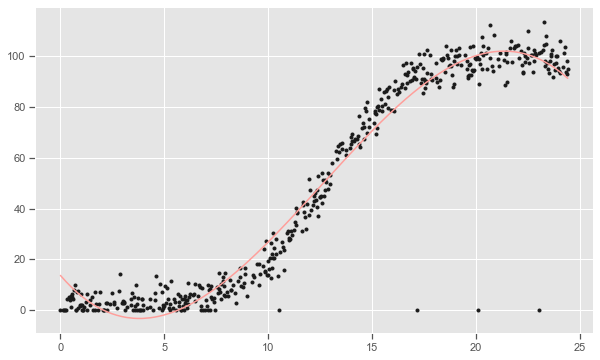

In [47]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x + b * x * x+ c*x + d, 'r-')

### A Fourth order polynomial
$ax^4+bx^3+cx^2+dx +e=0$


In [48]:
# Create variables with those values.
a,b,c,d,e =np.polyfit(x, y, 4)

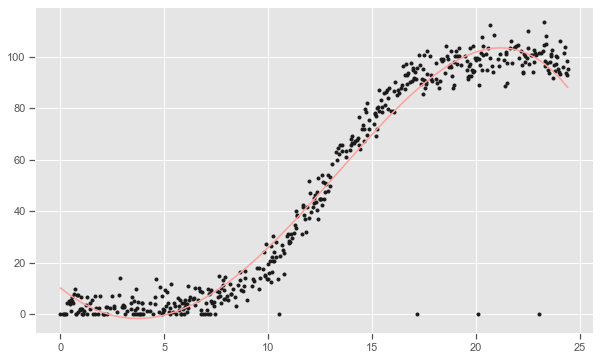

In [49]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x* x + b * x * x* x + c * x * x + d* x + e, 'r-')

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [50]:
# assign speed to x and power to y, 
x = np.array(df.speed)
y = np.array(df.power)
# for indexing the array
x = x[:, np.newaxis]
x.shape
y = y[:, np.newaxis]
y.shape

(490, 1)

In [51]:
# Create a linear regression model instance.
reg = lm.LinearRegression()

In [52]:
# Train the model using the training sets
reg.fit(x,y)

LinearRegression()

In [53]:
# Here's our intercept.
reg.intercept_

array([-18.42430465])

In [54]:
reg.coef_

array([[5.46239532]])

In [55]:
# See how good our fit is.
reg.score(x, y)

0.8710461537065195

In [56]:
#plt.plot(x, y, 'x')

In [57]:
#reg = lm.Ridge(alpha=.5)

Machine learning is the science of getting computers to act without being explicitly programmed.
- https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=A%20neural%20network%20is%20a,organic%20or%20artificial%20in%20nature.
- https://en.wikipedia.org/wiki/Artificial_neural_network

- https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

>Neural nets are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples.
>Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they’re “feed-forward,” meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.
>To each of its incoming connections, a node will assign a number known as a “weight.” When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. It then adds the resulting products together, yielding a single number. If that number is below a threshold value, the node passes no data to the next layer. If the number exceeds the threshold value, the node “fires,” which in today’s neural nets generally means sending the number — the sum of the weighted inputs — along all its outgoing connections.
When a neural net is being trained, all of its weights and thresholds are initially set to random values. Training data is fed to the bottom layer — the input layer — and it passes through the succeeding layers, getting multiplied and added together in complex ways, until it finally arrives, radically transformed, at the output layer. During training, the weights and thresholds are continually adjusted until training data with the same labels consistently yield similar outputs.
[Mit News](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)[nn1]

## Machine Learning - Neural Networks

Here I will go through the lecture notes first and apply some of the techniques.
Some notes from the lectures:
A dataset contains variables, some inputs and outputs. Categorical data, text and image data must first be encoded into floating point numbers. Outputs can be reverse decoded later. Weights are applied to each connection between layers, low weights near 0 meaning that the route is not important while higher values mean this route is important. 
Some of the dataset can be held back for testing. 
Neural networks have several layers. The input layer is really a non-layer of neurons with just the inputs. You just provide the input layer to the neural network and this is really the only place the input comes into it.

The hidden layers and output layers have proper neurons.
The weights and bias are the paramters of the model, you can tweak them to get the neural network to perform better. Often the initial weights might be set to small random values between 0 and 1. 
Neural networks cares more about the connections between the nodes than the actual nodes themselves. Looks at the signal times the weights for each of the inputs. `w * x` for each input. 

The bias significes how important something is and is just a number on top of weight times input for each neuron. 
With neural networks you want to get a high value assigned to the correct output. If the neural network misclassifies an output label then you just feed it back into the algorithm, the weights are changed a little so that the correct output is predicted the next time. It will keep changing until it gets the correct output. 
Starts out with random values for the weights. These are updated slowly over time to get towards the expected output.


Gradient descent is the algorithm through which the weights are updated. Stochastic gradient descent (`sgd`).
Each output from each neuron is the same but when the different weights are applied, what is received by the nodes in the next layer are different to what left the nodes on the previous layer.
The loss is the cost function, often the MSE mean squared error.

A linear function y = x is just a simple function where you give it a single input and expect the same output.

Once the neural network is trained and is stable, you can then take a new input, a new datapoint it was not trained on and the neural network should correctly classify it.
the complexity in neural networks comes from the number of operations involved especially when there are many layers.

---

https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
Taking notes from another machine learning mastery tutorial.

### The 5-step Deep Learning Model Life-Cycle
A model has a life-cycle with 5 steps:
1. Define the model: 
Select the type of model and choose the architecture or network topology. Define the number of layers, configure each layer with a number of nodes and activation function, connect the layers together into a cohesive model.

2. Compile the model

    * This requires selecting a **loss function** that you want to optimise such as mean squared error and to select an algorithm to perform the **optimisation** procedure such as stochastic gradient descent or a modern variation of this called Adam. Also you can select the **performance metrics**  to keep track of during the model training process.
    * Call a function to compile the model with the selected configuration to prepare the appropriate data structures required for the efficient use of the selected model. 
    * The optimizer can be specified as a string for a known optimizer class such as `sgd` for stochastic gradient descent or else you can configure an instance of the optimizer class to use. See [optimizer classes](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

    * `sgd` - Gradient descent (with momentum) optimizer. The default learning rate is 0.01
    The update rule is ` w = w - learning_rate * g` for parameter `w` with  gradient `g` when momentum is 0.
    * 

    *Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.* [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam]
    *  The `learning_rate` defaults to 0.001 in the Adam optimizer. 

    - Loss Functions: class MeanSquaredError: Computes the mean of squares of errors between labels and predictions.
    The mean squared error is the one I will be using. There are many more listed in the [keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) documentation.
    
    * Metrics to evaluate predictions such as `Accuracy`  which calculates how often predictions equal labels, `AUC` computes the approximate area under the curve,  `FalseNegatives` which calculates the number of false negatives and `FalsePositives` calculates the number of false positives, `Precision` computes the precision of the predictions with respect to the labels. 
    There are many more [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) which I will come back when I get to that point...

3. Fit the model

To fit the model you need to select the training configuration such as the number of epochs which are loops through the training dataset. The batch size is the number of samples in an epoch used to estimate model error.
(By passing in say 10 at a time instead of 1 at a time can have a smoothing effect)

Training applies the chosen optimization algorithm to minimize the chosen loss function and updates the model using the backpropagation of error algorithm. This can be slow depending on the complexity of the model, the size of the training dataset and the hardware being used.

There is another machine learning article here on [the importance of batch sizes](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)



4. Evaluate the model

This is where the holdout dataset comes into play, data that is not used in the training of the model so you can get an unbiased estimate of the performance of the model when making predictions on new data.

5. Make predictions
This is the final stage of the life cycle where you take values that you don't have target values and make a prediction.

### Sequential model
A **sequential** model adds layers to the model one by one in a linear manner, from input to output.
    The visible layer of the network is defined by the input shape argument on the first hidden layer. In the wind dataset this will be `(1,)` - the model will expect the input for one sample to be a vector of 1 number.
`model.add()` is used to add each layer.

There is also a functional model which is more complex but more flexible. It involves explicitly connecting the output of one layer to the input of another layer. Each connection is specified. I will be using the sequential model for this project.

###  Develop Multilayer Perceptron Models

A Multilayer Perceptron model (MLP)is a standard fully connected neural network model. It is made up of one or more (dense) layers of nodes where each node is connected to all outputs from the previous layer and the output of each node is connected to all the inputs for the nodes in the next layer. This model is suitable for tabular data and can be used for three predictive modeling problems being binary classification, multiclass classification, and regression. 
The tutorial demostrates using MLP for each of the three predictive modeling problems.



### Import required packages

In [58]:
# Neural networks.
import tensorflow.keras as kr
print(kr.__version__)

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
# splitting the data into training and test 
from sklearn.model_selection import train_test_split



2.4.0


### The data:

In [78]:
# mlp for regression
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
path = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
df = pd.read_csv(csv_url)

In [79]:
df
# drop some of the outliers
df.drop(df.loc[(df.speed>24.4)].index, inplace=True)

## note - going to try dfx here 
This is the dataframe where all the zero values are dropped. Not yet decided on the correct course of action.

In [194]:
dfz = df.copy()
dfz.drop(dfz.loc[(dfz.power == 0) & (dfz.speed > 7)].index, inplace=True)

In [195]:
dfz.describe()

,speed,power
count,484.000000,484.000000
mean,12.319091,49.601843
std,7.091277,41.355119
min,0.000000,0.000000
25%,6.124750,6.124750
50%,12.374500,44.840500
75%,18.399250,93.809500
max,24.399000,113.556000


### The data split into training and test sets

- df is the original dataset with all 500 datapoints,
- dfx is a copy with all the zero values dropped
- dfz is another copy where I dropped the rows with zero power when the speed is over a certain value as I really don't think all the zero values should be dropped. There are quite a lot of them in the dataset.

In [197]:

# split into input and output columns

#X, y = df.values[:, :-1], df.values[:, -1]
#X, y = dfx.values[:, :-1], dfx.values[:, -1]
X, y = dfz.values[:, :-1], dfz.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]

(324, 1) (160, 1) (324,) (160,)


### Define the model:

In [198]:
# Train a model
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

### Compile the model

In [199]:
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                100       
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 351
Trainable params: 251
Non-trainable params: 100
_________________________________________________________________


### Plotting the learning curve

Back to the https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ tutorial. The next section looks at plotting model learning curves which plot the performance of the neural network model over time. It helps determine if the model is learning well and whether it is underfitting or overfitting the training set.To do this you need to update the call to to the `fit` function to include a reference to a validation dataset which is a portion of the training dataset not used to fit the model but instead used to evaluate the performance of the model during training. The fit function will then return a history object containing a trace of performance metrics recorded at the end of each training epoch. A learning curve is a plot of the loss on the training dataset and the validation dataset.

In [200]:
history = model.fit(X_train, y_train, epochs=500, batch_size=10, verbose=0, validation_split=0.3)

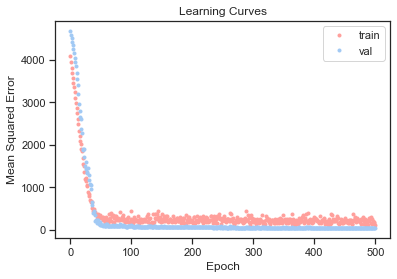

In [201]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], 'r.',label='train')
plt.plot(history.history['val_loss'], 'b.',label='val')
plt.legend()
plt.show()

Immediately the difference is obvious in the learning curve when all the 49 points with zero power values are dropped. It might not be right though!
Compromise here with some values dropped where speed is greater than a particular value. I chose 7 for now.

### Fit the model

In [202]:
# fit the model
model.fit(X_train, y_train, epochs=500, batch_size=20) #verbose=0

Epoch 1/500
17/17 [==============================] - 0s 2ms/step - loss: 161.9782
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 158.5665
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 193.0156
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 133.3733
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 152.7920
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 132.3562
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 117.4157
Epoch 8/500
17/17 [==============================] - 0s 2ms/step - loss: 161.7991
Epoch 9/500
17/17 [==============================] - 0s 1ms/step - loss: 207.0759
Epoch 10/500
17/17 [==============================] - 0s 1ms/step - loss: 83.5135
Epoch 11/500
17/17 [==============================] - 0s 2ms/step - loss: 158.3544
Epoch 12/500
17/17 [==============================] - 0s 2ms/step - loss: 173.8761
Epoch 13/500
1

17/17 [==============================] - 0s 1ms/step - loss: 183.1738
Epoch 101/500
17/17 [==============================] - 0s 1ms/step - loss: 89.8635
Epoch 102/500
17/17 [==============================] - 0s 1ms/step - loss: 138.4973
Epoch 103/500
17/17 [==============================] - 0s 2ms/step - loss: 100.0945
Epoch 104/500
17/17 [==============================] - 0s 2ms/step - loss: 99.0326
Epoch 105/500
17/17 [==============================] - 0s 3ms/step - loss: 117.2860
Epoch 106/500
17/17 [==============================] - 0s 2ms/step - loss: 103.5297
Epoch 107/500
17/17 [==============================] - 0s 2ms/step - loss: 104.5730
Epoch 108/500
17/17 [==============================] - 0s 3ms/step - loss: 119.1237
Epoch 109/500
17/17 [==============================] - 0s 2ms/step - loss: 107.9209
Epoch 110/500
17/17 [==============================] - 0s 3ms/step - loss: 115.7028
Epoch 111/500
17/17 [==============================] - 0s 3ms/step - loss: 98.0871
Epoch 112

17/17 [==============================] - 0s 1ms/step - loss: 141.6317
Epoch 199/500
17/17 [==============================] - 0s 1ms/step - loss: 111.9638
Epoch 200/500
17/17 [==============================] - 0s 2ms/step - loss: 111.9200
Epoch 201/500
17/17 [==============================] - 0s 2ms/step - loss: 88.7005
Epoch 202/500
17/17 [==============================] - 0s 1ms/step - loss: 100.5093
Epoch 203/500
17/17 [==============================] - 0s 1ms/step - loss: 121.2709
Epoch 204/500
17/17 [==============================] - 0s 1ms/step - loss: 127.2464
Epoch 205/500
17/17 [==============================] - 0s 1ms/step - loss: 114.6711
Epoch 206/500
17/17 [==============================] - 0s 1ms/step - loss: 136.2349
Epoch 207/500
17/17 [==============================] - 0s 1ms/step - loss: 91.2441
Epoch 208/500
17/17 [==============================] - 0s 1ms/step - loss: 134.3753
Epoch 209/500
17/17 [==============================] - 0s 1ms/step - loss: 129.7713
Epoch 21

17/17 [==============================] - 0s 1ms/step - loss: 98.2928
Epoch 297/500
17/17 [==============================] - 0s 2ms/step - loss: 95.8298
Epoch 298/500
17/17 [==============================] - 0s 2ms/step - loss: 164.8260
Epoch 299/500
17/17 [==============================] - 0s 1ms/step - loss: 139.6313
Epoch 300/500
17/17 [==============================] - 0s 1ms/step - loss: 105.0527
Epoch 301/500
17/17 [==============================] - 0s 1ms/step - loss: 107.3644
Epoch 302/500
17/17 [==============================] - 0s 1ms/step - loss: 86.8556
Epoch 303/500
17/17 [==============================] - 0s 1ms/step - loss: 166.4052
Epoch 304/500
17/17 [==============================] - 0s 2ms/step - loss: 77.6401
Epoch 305/500
17/17 [==============================] - 0s 1ms/step - loss: 98.7364
Epoch 306/500
17/17 [==============================] - 0s 1ms/step - loss: 119.2047
Epoch 307/500
17/17 [==============================] - 0s 1ms/step - loss: 106.5584
Epoch 308/5

17/17 [==============================] - 0s 1ms/step - loss: 96.3463
Epoch 395/500
17/17 [==============================] - 0s 2ms/step - loss: 156.8553
Epoch 396/500
17/17 [==============================] - 0s 1ms/step - loss: 123.4299
Epoch 397/500
17/17 [==============================] - 0s 1ms/step - loss: 88.1678
Epoch 398/500
17/17 [==============================] - 0s 2ms/step - loss: 54.0788
Epoch 399/500
17/17 [==============================] - 0s 1ms/step - loss: 95.5685
Epoch 400/500
17/17 [==============================] - 0s 1ms/step - loss: 103.7143
Epoch 401/500
17/17 [==============================] - 0s 1ms/step - loss: 97.9999
Epoch 402/500
17/17 [==============================] - 0s 2ms/step - loss: 79.4696
Epoch 403/500
17/17 [==============================] - 0s 1ms/step - loss: 179.9887
Epoch 404/500
17/17 [==============================] - 0s 2ms/step - loss: 134.8370
Epoch 405/500
17/17 [==============================] - 0s 2ms/step - loss: 134.0685
Epoch 406/50

17/17 [==============================] - 0s 2ms/step - loss: 141.1940
Epoch 493/500
17/17 [==============================] - 0s 2ms/step - loss: 217.6991
Epoch 494/500
17/17 [==============================] - 0s 2ms/step - loss: 116.3348
Epoch 495/500
17/17 [==============================] - 0s 1ms/step - loss: 156.5936
Epoch 496/500
17/17 [==============================] - 0s 1ms/step - loss: 140.2540
Epoch 497/500
17/17 [==============================] - 0s 1ms/step - loss: 104.2166
Epoch 498/500
17/17 [==============================] - 0s 1ms/step - loss: 73.2574
Epoch 499/500
17/17 [==============================] - 0s 1ms/step - loss: 115.1370
Epoch 500/500
17/17 [==============================] - 0s 2ms/step - loss: 129.8487


### Evaluate the model:

In [184]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 24.730, RMSE: 4.973


This is the initial plot I did before comparing the actual data set to the predicted values using the model. When I did this first I didn't split the data.

## dfx here!
dfx has all the zeros dropped. 
dfz has some of the zero values dropped

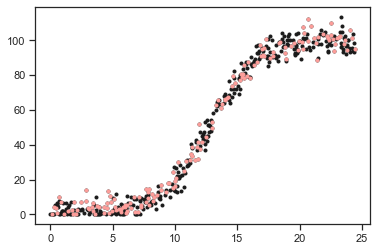

In [203]:
# plot actual data 
#plt.plot(df['speed'], df['power'], 'k.',label='actual')
#plt.plot(dfx['speed'], dfx['power'], 'k.',label='actual')
plt.plot(dfz['speed'], dfz['power'], 'k.',label='actual')
# plot predicted values for the test set
plt.plot(X_test, y_test, 'r.', label='predicted on test set')

### Saving and loading the model
Instead of having to retrain the model each time,  it can be saved to a file using the `save()` function on the model and loaded later to make predictions using the `load_model()` function. The model is saved in H5 format, an efficient array storage format.
For this I need  the `h5py` library. 

In [96]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [204]:
model.save('model.h5')

In [205]:
model = kr.models.load_model('model.h5')

In [208]:
speed = [20.647]
yhat= model.predict(speed)
print('Predicted: %.3f' % yhat[0])

Predicted: 95.972


In [209]:
speed = [22]
yhat= model.predict(speed)
print('Predicted: %.3f' % yhat[0])

Predicted: 96.079


In [210]:
speed = [5]
yhat= model.predict(speed)
print('Predicted: %.3f' % yhat[0])

Predicted: 1.023


## Here! look at scaling

- whether to keep all zeros in or out
- scaling the input and output values


I have followed both the machine learning mastery tutorial and Ian's class and applied to the data.
I did split the data set this time, some zero values have been taken out. I think I need to eliminate some more but I'll come back to this. The curve looks pretty good. 

I did not scale or preprocess the data this time although I did the first time. Another machine learning mastery tutorial on this to read up on first! I think I need to scale both the input and output target values. but I will come back to this another time.


https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/



The [Introduction to Keras for Engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/) does suggest that data preprocessing should be done such as feature normalisation.

The data needs to be either NumPy arrays or tf.data.Dataset objects.  The dataset for this project is in csv format. I have already read it into a pandas dataframe but it can be easily converted into a numpy array. I already converted it above.

x = np.array(df.speed)
y = np.array(df.power)

- Do preprocessing such as feature normalisation.
The data consists of two columns of data and thats it. The only preprocesing that is applicable here is to rescale the data to small values as in general the input values to a neural network should be close to zero. According to the tutorial  the data should either be rescaled to have zero-mean and unit-variance or the data in the `[0.1]` range. The preprocessing should ideally be done as part of the model to make it more portable in production. In Keras the preprocessing is done via preprocessing layers which can be included directly into your model either during training or after training. Some preprocessing layers have a state, in this case normalization holds the mean and variance of the features and can be obtained by calling `layer.adapt(data)` on a sample or all of the training data.



CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.

In [ ]:
X, y = dfz.values[:, :-1], dfz.values[:, -1]

In [212]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = X

normalizer = Normalization(axis=1)
normalizer.adapt(X)


normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: -0.0000


In [179]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]


The data is already numerical so no encoding is required.
The training set will be the speed and power values from the dataset.
I initially followed the lectures and used just one neuron but this did not do so well.

For now I am following the notebooks provided by Ian and a few tutorials on Machine Learning Mastery.
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ demonstrates a fully connected network structure with three layers.

Create a Sequential Model and  add layers one at a time until happy with the network architecture. A sequential neural network is built up in sequential layers.

The first thing is to ensure the input layer has the right number of input features. You provide the input layer to the model
The dataset here has only a single input feature which is wind speed. How to determine the correct number of layers to use? According to the tutorial its a matter of trial and error really. Generally you need a network large enough to capture the structure of the problem.

Fully connected layers are defined using the `Dense` class.  Dense refers to the layer being densely connected to the previous layer. Every node in the previous layer is connected to everything in the current layer.


The number of neurons or nodes in the layer as the first argument and specify the activation function using the `activation` argument. The demo uses the `rectified linear unit` activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer. As far as I recall Ian recommended using just the Sigmoid activation function. According to the tutorial, Sigmoid and Tanh activation functions were the preferred choice  for all layers before but that these days better performance is achieved using the ReLU activation function. I can try one or the other.  A `Sigmoid` layer is used on the outer layer to ensure the network output is between 0 and 1. (This problem though is not looking to classify the data into one of two classes.).
The input shape is 1 as there is only 1 input variable. (input_dim=1 or input_shape=(1,))
The shape of the input to the model is defined as an argument on the first hidden layer. The first line of code that adds the first Dense layer does 2 things, defines the input or visible layer and the first hidden layer.





#### compile
Once the model is defined, it can be compiled or built. We specify the learning rate and the loss function which we want to minimise.

When compiling, some additional properties are required when training the network. Training a network means finding the best set of weights to map inputs to outputs in our dataset. The loss function must be specified
>We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

The tutorial uses cross entrophy as the loss argument as it is looking at a binary classification problem. We are to stick with mean squared error I think.
>The optimizer is defined below as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

In [191]:

# Train a different model
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [184]:
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                100       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


The model shows 153 total parameters. This is made up of the single input in the input layer, 50 neurons plus 50 bias terms in the hidden layer.


In [192]:
# This is the unprocessed or unscaled data
x = df['speed']
y = df['power']

Train a new model using the sigmoid function as the activation function.
Using the sigmoid function instead of the linear function which is clearly not a good fit.


Now training a different model. This one has a hidden layer with 60 neurons. A different kernel initialiser is used. the batch size is how many x's are sent it at any one time. Instead of sending one x in and adjusting the weights and the biases, send it 10 at a time. This sometimes has a smoothing effect. It still sends each x in 500 times (for 500 epochs) but 10 at a time instead of 1 at a time.


In [200]:
accuracy = model.evaluate(x, y)

16/16 [==============================] - 0s 1ms/step - loss: 75.1917 - accuracy: 0.0000e+00


The zero values for power at high levels of speed does seem to be pulling the curve down so maybe I need to take them out. The rest of the data seems to be quite well modelled.
I need to read more into this. Overall it is still impressive that with only a single numerical input for speed you can still get such a close match to what the power values look like.

The loss is still quite high and did not come down much despite playing around with the parameters.
The ideal loss is is zero and the ideal accuracy is 1.0 or 100%.
>The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

I need to split the data also into a training and test set.
See https://scikit-learn.org/stable/modules/cross_validation.html
`from sklearn.model_selection import train_test_split` 
`X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)`

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
Here I am reading through the article referenced, making notes and some paraphrasing. I will reference properly later.

An artificial neuron calculates a weighted sum of its input, adds a bias and then decides whether it should be fired or not. $ Y = \sum{(\text{weight} * \text{input})} + \text{bias}$
The value of Y can be anything from -infinity to + infinity. The neuron does not really know the bounds of the value. So how do we decide whether the neuron should fire or not? This is where the activation functions come in. The activation function will check the Y value produced by the neuron and decide whether outside connections should consider this neuron as activated (fired) or not.

Consider a threshold based activation function. If the value of Y is above a certain value then it could declare it as activated, otherwise not. In this case the output is 1 (activated) when the value is greater than than the threshold and 0 otherwise. This is a step function. There are drawbacks to using this method as an activation function for neural networks though when the response is not a binary yes or no.

A linear activation function A = cx is a straight line function where activation is proportional to input ( which is the weighted sum from neuron ). In this way it will give a range of activations rather than just binary activations. We can connect some neurons and if more than one fire then we could take the max and decide based on that.

The derivative w.r.x is c which means that the gradient has no relationship with X. The descent is going to be on a constant gradient. If there is an error in prediction the changes made by back propagation is constant and not depending on the change in input delta(x).
Another problem concerns the connected layers where each layer is activated by a linear function. 
That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function.
No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer. Therefore two or more layers can be replaced by a single layer. The whole network then is equivalent to  a single layer with linear activation.

Thw sigmoid function is smooth and looks somewhat like a step function. It is nonlinear in nature and therefore combinations of layers are also non-linear which means that layers can be stacked. It will also give non binary activations unlike the step function. It has a smooth gradient.

Between X values -2 to 2, the Y values are very steep.This means that any small changes in the values of X in that region will cause values of Y to change significantly.This means this function has a tendency to bring the Y values to either end of the curve.
It tends to bring the activations to either side of the curve making clear distinctions on prediction. Another advantage over linear function is that the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function and therefore the activations are bound in a range. 
Sigmoid functions are one of the most widely used activation functions today. The problems with them is that towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. This means that the gradient at that region is going to be small. It gives rise to a problem of “vanishing gradients”. When the activations reach near the “near-horizontal” part of the curve on either sides, the gradient is small or has vanished ( cannot make significant change because of the extremely small value ). The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ). There are ways to work around this problem and sigmoid is still very popular in classification problems.
The article also looked at the Tanh activation functions which is a scaled sigmoid function and the ReLu function which gives an output x if x is positive and 0 otherwise. These are both non-linear functions.

The article finishes by suggesting how to choose the correct activation function. 
When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process. For example, a sigmoid works well for a classifier 

https://www.computing.dcu.ie/~humphrys/Notes/Neural/sigmoid.html
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

### End